In [30]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from karateclub.dataset import GraphReader

reader = GraphReader("twitch")

graph = reader.get_graph()
y = reader.get_target()

In [31]:
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 7126\nNumber of edges: 35324\nAverage degree:   9.9141'

In [16]:
from karateclub import DeepWalk

model = Diff2Vec(dimensions=64)
model.fit(graph)
X = model.get_embedding()

In [17]:
X

array([[-1.0940071 ,  0.6634695 , -0.35321265, ...,  0.13395189,
         0.30999795,  0.14947864],
       [-0.07322863, -1.2142566 ,  1.9357494 , ...,  0.49046165,
         0.8310766 , -1.5011977 ],
       [-0.23608817,  0.31833908,  0.17817482, ...,  0.81647336,
         0.2133352 ,  0.5065616 ],
       ...,
       [ 0.80022424,  1.9550458 , -1.3445162 , ..., -1.6646028 ,
         3.829967  , -0.22620302],
       [ 1.7967317 ,  1.6303848 , -0.97350985, ..., -1.4684036 ,
         0.79918563,  1.8495795 ],
       [ 2.0727077 , -1.9437145 , -0.05728374, ...,  0.06646162,
        -0.16485979, -0.6328429 ]], dtype=float32)

In [21]:
## Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [22]:
## Feature Scaling
sc_dfa = StandardScaler()
dfa_std = sc_dfa.fit_transform(X)

## Clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=42).fit(dfa_std)
labels = kmeans.labels_

In [37]:
dfa_std

array([[-1.1527998 ,  0.57167953, -0.26619205, ...,  0.12829606,
         0.09952869,  0.10353517],
       [-0.30163485, -1.0002462 ,  1.5770122 , ...,  0.43342042,
         0.55318284, -1.2472811 ],
       [-0.4374335 ,  0.28275594,  0.1617118 , ...,  0.7124425 ,
         0.01537352,  0.3957508 ],
       ...,
       [ 0.42668435,  1.6529139 , -1.0644468 , ..., -1.4110243 ,
         3.1640346 , -0.20390058],
       [ 1.2576112 ,  1.3811262 , -0.7656911 , ..., -1.2431043 ,
         0.5254184 ,  1.4947975 ],
       [ 1.4877307 , -1.6109068 , -0.02789301, ...,  0.0705335 ,
        -0.3138853 , -0.5366707 ]], dtype=float32)

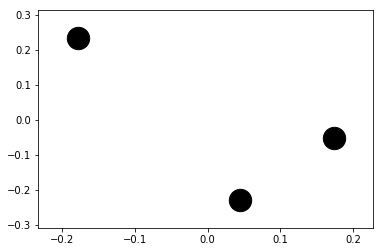

In [35]:
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=500)

In [33]:
from collections import Counter
Counter(labels)

Counter({0: 2693, 1: 2189, 2: 2244})